# Домашнее задание (10 баллов)


(2 балла)
1. закончить реализацию `ClassificationDecisionTree` в decision_tree
    1. реализовать feature_importance_ (для этого метода теста нет, подойдет реализацию любого варианта, базовый способ - рекурсивно суммировать по всем `self.feature_id` `self.q_value_max` и вывести суммы. 
    2. проверить корректность predict 
2. реализовать `BaseSampler`, `ObjectSampler` и `FeatureSampler`. `BaseSampler` - базовый класс, у которого должен быть реализован метода `sample_indices` - вернуть индексы сэмплов. `ObjectSampler` сэплирует объекты, `FeatureSampler` - признаки.
3. реализовать `RandomForestClassifier` в random_forest (predict/predict_proba).

Обратите внимение, что в random_forest в качестве `base_estimator` предполагается использовать `DecisionTreeClassifier` из sklearn, использовать вашу реализацию решающего дерева необязательно. <br> Пример запуска тестов 
- `python -m unittest discover sem_dt_rf/decision_tree/tests`
- `python -m unittest discover sem_dt_rf/random_forest/tests` 

Или через `pytest`
- `python -m pytest sem_dt_rf/decision_tree/tests/test_criterio.py`

In [1]:
!python -m unittest discover decision_tree/tests
!python -m unittest discover random_forest/tests

...........
----------------------------------------------------------------------
Ran 11 tests in 0.102s

OK
........
----------------------------------------------------------------------
Ran 8 tests in 0.014s

OK


(1 балл) Для регрессионного дерева необходимо использовать такой критерий:
$$H(R) = \min_c \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c)^2$$

Докажите, что минимум H(R) достигается при $c$:

$$ c = \frac{1}{|R|} \sum_{(x_j, y_j) \in R} y_j$$

**Решение:** продифференцируем функцию под знаком минимума по $c$: $$\frac{1}{|R|} \sum\limits_{(x_i,y_i) \in R} 2(c - y_i) = 2\left(c - \frac{1}{|R|}\sum\limits_{(x_i,y_i) \in R} y_i\right) = 0 \Longleftrightarrow c = \frac{1}{|R|} \sum\limits_{(x_i, y_i)\in R} y_i.$$
Так как квадратичная функция выпукла, то необходимое условие экстремума является достаточным и локальный минимум совпадает с глобальным, значит $\displaystyle\arg\min\limits_{c} \left(\frac{1}{|R|} \sum\limits_{(x_i,y_i) \in R} (y_i - c)^2\right) = \frac{1}{|R|} \sum\limits_{(x_i, y_i)\in R} y_i$.

(3 балла) Реализуйте регрессионное дерево. В качестве критерия необходимо использовать критерий, определённый в пункте 2, в коде есть заглушка `MSECriterion`. В качестве `predict` необходимо использовать среднее значение ответов по всем объектам в листе. В коде нет готовой заглушки, реализуйте по аналогии с `class ClassificationDecisionTree(DecisionTree):`.

Сгенерируйте однопризнаковую выборку для тестирования дерева и покажите работу дерева на этой выборке (пример см. ниже, можно использовать свою версию). Отобразите на одном графике `predict` алгоритма и значение признака. Что меняется при изменении параметра глубины? Сделайте выводы.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.extend([r"C:\Users\62174\OneDrive\Рабочий стол\Jupyter Notebooks\AIMasters\2 sem\ML2"])

from decision_tree.decision_tree import RegressionDecisionTree
%load_ext autoreload
%autoreload 2

In [3]:
# generate example
x_shape = 300
x = np.arange(x_shape) / 100
y = x**3 * np.sin(x**3) + np.random.random(x_shape)

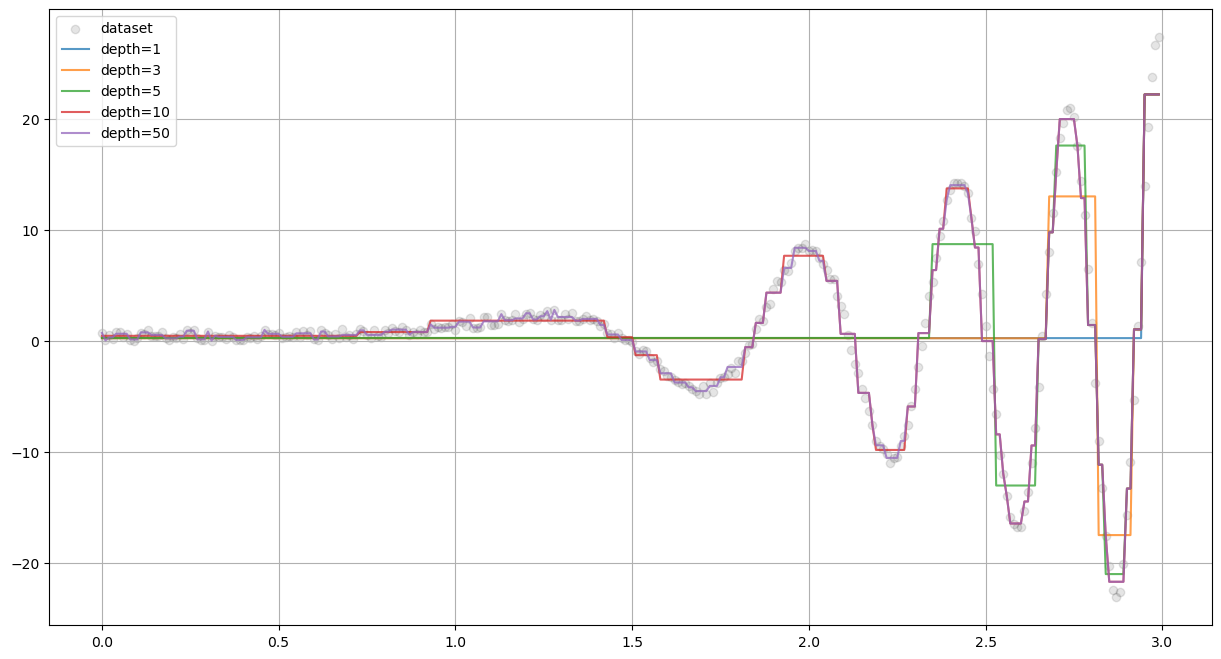

In [4]:
plt.figure(figsize=(15, 8))
plt.scatter(x, y, alpha=0.1, color='black', label='dataset')

for depth in [1, 3, 5, 10, 50]:
    regr_tree = RegressionDecisionTree(max_depth=depth)
    regr_tree.fit(x[:, None], y)
    y_pred = regr_tree.predict(x[:, None])
    plt.plot(x, y_pred, alpha=0.75, label=f'depth={depth}')

plt.legend()
plt.grid()
plt.show()

**Выводы:** из графика видно, что чем больше значение глубины дерева, тем сильнее оно подгоняется под обучающую выборку. При небольшой глубине (`1 <= depth <= 3`) видно всего пару "пеньков" преимущественно в области, где большой разброс таргета. При большой глубине (`depth = 50`) видно, что алгоритм буквально "выучил" всю обучающую выборку и слишком сильно подогнался под шум.

(4 балла) Протестируйте различные реализации `random_forest` на `fetch_covtype` датасете (можно загрузить с помощью `sklearn.datasets.fetch_covtype`). Возможно, поможет ноутбук с семинара `ensembles_seminar.ipynb`. Для честного сравнения старайтесь использовать похожий набор гиперпараметров.
- ваша реализация (import `RandomForestClassifier as MyRandomForestClassifier` ниже)
- sklearn https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- lightgbm https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMModel.html см. параметр `boosting_type`
- xgboost https://xgboost.readthedocs.io/en/stable/tutorials/rf.html

    Что нужно сделать: 
- Разбейте данные на train и test. 
- Оцените качество алгоритмов по метрике (balanced_accuracy_score)[https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html]
- Оцените время работы `train` и `predict`
- Сделайте выводы

In [5]:
from random_forest.random_forest import RandomForestClassifier as MyRandomForestClassifier

In [6]:
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb

In [7]:
cov_type = fetch_covtype()

In [8]:
# preparing data
X, y = cov_type['data'], cov_type['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
from time import time

accs = {
    'my_rf': [],
    'sklearn': [],
    'lgb': [],
    'xgb': []
}
train_time = {
    'my_rf': [],
    'sklearn': [],
    'lgb': [],
    'xgb': []
}
pred_time = {
    'my_rf': [],
    'sklearn': [],
    'lgb': [],
    'xgb': []
}

max_depth, n_trees = 10, 100

# test my_rf
my_rf = MyRandomForestClassifier(
    n_estimators=n_trees, 
    max_depth=max_depth, 
    max_objects_samples=0.9, 
    max_features_samples=0.8,
    random_state=42
)
start_time = time()
my_rf.fit(x_train, y_train - 1)
train_time['my_rf'].append(time() - start_time)
start_time = time()
y_pred = my_rf.predict(x_test)
pred_time['my_rf'].append(time() - start_time)
accs['my_rf'].append(balanced_accuracy_score(y_test, y_pred + 1))

# test sklearn_rf
sklearn_rf = RandomForestClassifier(
    n_estimators=n_trees, 
    max_depth=max_depth, 
    max_features=0.8, 
    max_samples=0.9,
    random_state=42, 
    n_jobs=-1
)
start_time = time()
sklearn_rf.fit(x_train, y_train)
train_time['sklearn'].append(time() - start_time)
start_time = time()
y_pred = sklearn_rf.predict(x_test)
pred_time['sklearn'].append(time() - start_time)
accs['sklearn'].append(balanced_accuracy_score(y_test, y_pred))

# test xgboost
params_xgb = {
    "booster": "gbtree",
    "subsample": .9,
    "colsample_bynode": .8,
    "max_depth": max_depth,
    "num_parallel_tree": n_trees,
    "objective": "multi:softmax",
    "num_class": len(np.unique(y)),
    "eta":1,
    "random_state": 42,
    "n_jobs": -1,
}
xgb_train = xgb.DMatrix(x_train, label=y_train - 1)
start_time = time()
xgb_rf = xgb.train(params_xgb, xgb_train, num_boost_round=1)
train_time['xgb'].append(time() - start_time)
xgb_test = xgb.DMatrix(x_test)
start_time = time()
y_pred = xgb_rf.predict(xgb_test)
pred_time['xgb'].append(time() - start_time)
accs['xgb'].append(balanced_accuracy_score(y_test, y_pred + 1))

# test lightgbm
params_lgb = {
    "max_depth": max_depth,
    "objective": "multiclass",
    "num_classes": len(np.unique(y)),
    "boosting": "rf",
    "seed": 42,
    "subsample": .9,
    "colsample_bytree": .8,
    "subsample_freq": 1,
    "verbose": -1,
}
lgb_train = lgb.Dataset(data=x_train, label=y_train - 1)
start_time = time()
lgb_rf = lgb.train(params_lgb, train_set=lgb_train, num_boost_round=n_trees)
train_time['lgb'].append(time() - start_time)
start_time = time()
y_pred = lgb_rf.predict(x_test).argmax(axis=1)
pred_time['lgb'].append(time() - start_time)
accs['lgb'].append(balanced_accuracy_score(y_test, y_pred + 1))


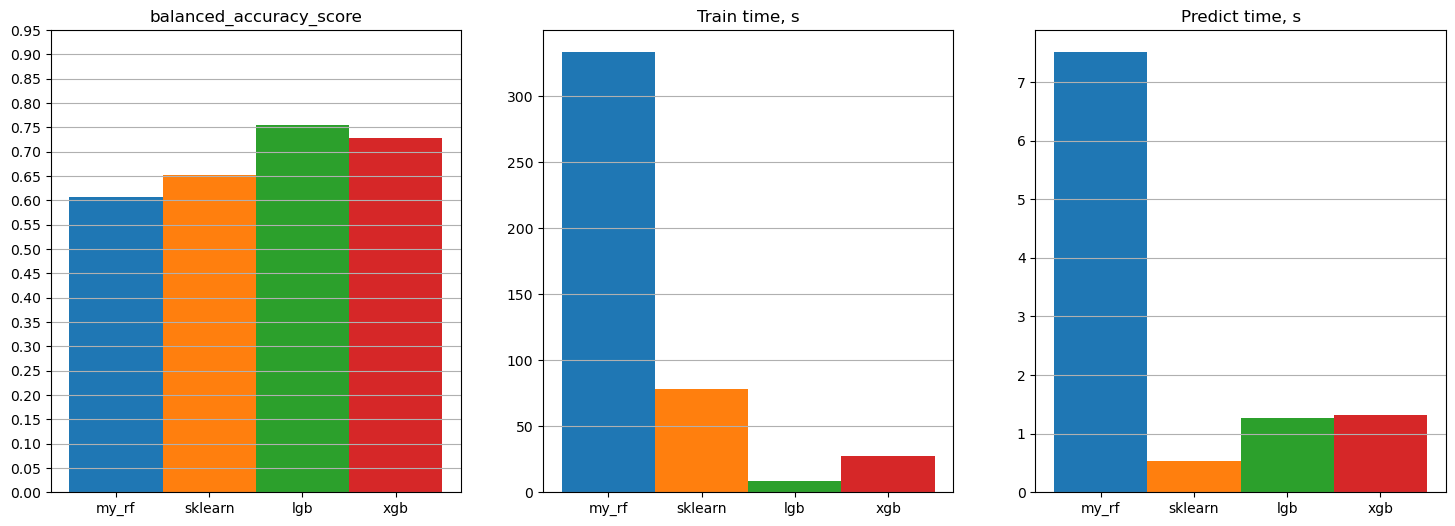

In [10]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(18, 6)

i = -1.5
for key in accs.keys():
    ax[0].bar(x=i, width=1, height=accs[key])
    ax[1].bar(x=i, width=1, height=train_time[key])
    ax[2].bar(x=i, width=1, height=pred_time[key])
    i += 1

ax[0].set_title('balanced_accuracy_score')
ax[0].yaxis.grid()
ax[0].set_yticks(np.arange(0, 1, 0.05))
ax[0].set_xticks(np.arange(-1.5, 2), accs.keys())

ax[1].set_title('Train time, s')
ax[1].yaxis.grid()
ax[1].set_xticks(np.arange(-1.5, 2), accs.keys())

ax[2].set_title('Predict time, s')
ax[2].yaxis.grid()
ax[2].set_xticks(np.arange(-1.5, 2), accs.keys())

plt.show()

**Выводы:** 
* LightGBM обеспечивает наилучшее качество и наименьшее время обучения; 
* XGBoost на втором месте как по качеству, так и по времени обучения;
* SKLearn обеспечивает самое быстрое время `predict`;
* Собственноручная реализация проигрывает по всем показателям, однако качество не сильно уступает модели из SKLearn.